In [1]:
import ndlib.models.epidemics.SIModel as si
import ndlib.models.epidemics.SIRModel as sir
import ndlib.models.epidemics.SISModel as sis
import ndlib.models.epidemics.ThresholdModel as threshold
import ndlib.models.ModelConfig as mc
import networkx as nx
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison

In [179]:
import datetime
import time

In [15]:
# plot settings
import matplotlib.pyplot as plt

FIGSIZE_TWOCOL = (10,5)
FIGSIZE_ONECOL = (5,5)

SMALL_SIZE = 13
MEDIUM_SIZE = 15
BIGGER_SIZE = 20

plt.rc('font', size= MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize= MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize= MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [91]:
nytimes_id = 807095
repubblica_id =18935802


In [2]:
g = nx.read_edgelist('../network/networks/edge_list.txt',
                         create_using=nx.DiGraph(), nodetype=int, data=False)

In [119]:
g = g.reverse(copy=True)

In [120]:
degrees = [d for n, d in g.degree]
mean_k = sum(degrees)/len(degrees)


In [318]:
# model configuration
beta = 0.01
mu = 0.005
gamma = beta*0.9
print beta
print mu

cfg = mc.Configuration()
cfg.add_model_parameter('beta', beta)
#cfg.add_model_parameter('lambda', mu)
cfg.add_model_parameter('gamma', gamma)
cfg.add_model_initial_configuration("Infected", [nytimes_id])

model_ny = sir.SIRModel(g)
model_ny.set_initial_status(cfg)
model_ny.name= '@nytimes'
#
cfg_rep = mc.Configuration()
cfg_rep.add_model_parameter('beta', beta)
cfg_rep.add_model_parameter('gamma', gamma)
cfg_rep.add_model_initial_configuration("Infected", [repubblica_id])

model_rep = sir.SIRModel(g)
model_rep.set_initial_status(cfg_rep)
model_rep.name= '@repubblica'


0.01
0.005


In [319]:
iterations_ny = model_ny.iteration_bunch(200)
trends_ny = model_ny.build_trends(iterations_ny)

In [314]:
iterations_rep = model_rep.iteration_bunch(200)
trends_rep = model_rep.build_trends(iterations_rep)

In [315]:
cod_inf = model_rep.get_status_map()['Infected']
infected_rep = trends_rep[0]['trends']['node_count'][cod_inf]
infected_ny = trends_ny[0]['trends']['node_count'][cod_inf]

In [320]:
infected_ny[:10]

[1, 183, 489, 2912, 9000, 17717, 24643, 29426, 32921, 35627]

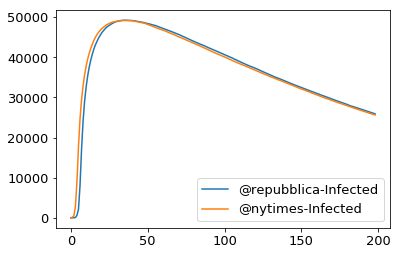

In [321]:
plt.plot(infected_rep[:199], label = "@repubblica-Infected")
plt.plot(infected_ny[:199], label ="@nytimes-Infected")
plt.legend()

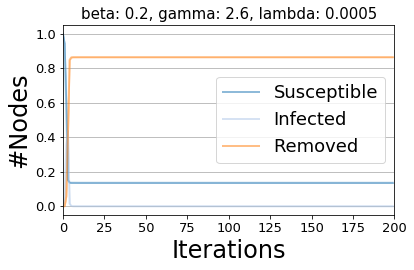

In [240]:
viz = DiffusionTrend(model_ny, trends_ny)
viz.plot()

In [215]:
#print model_ny.get_status_map()
infected_ny= []
for i in range(len(iterations_ny)):
    infected_ny.append(iterations_ny[i]['node_count'][model_ny.get_status_map()['Infected']])
    

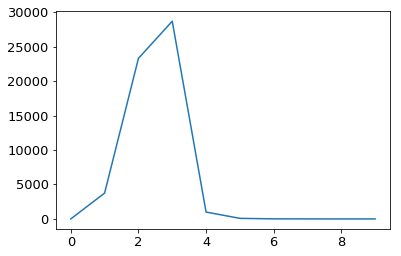

In [217]:
plt.plot(range(len(infected_ny[:10])), infected_ny[:10])

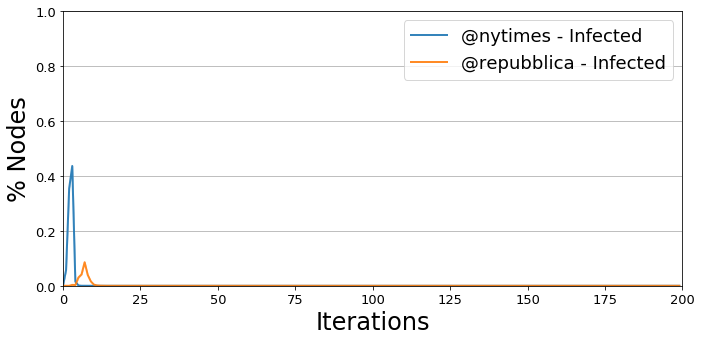

In [241]:
plt.subplots(figsize =FIGSIZE_TWOCOL)
viz = DiffusionTrendComparison( [model_ny, model_rep] , [trends_ny[:10],trends_rep[:10]])
plt.xlim(0,100)
viz.plot()
viz.plot('prova.pdf')